## Part 1b: Data analysis in Python 101
Objective: 

This notebook aims to help you understand one of the most important packages called Pandas for data analysis and apply it in daily work. 

Topics covered:
- Basic Pandas
- Data Cleansing
- Data Manipulation

Number of Exercise: 1

Expected Time to Finish: 1 hour

External resource if you want to learn more:
https://github.com/jvns/pandas-cookbook


#### i. Basic Pandas

In [1]:
# Import library Pandas and name it as pd
import pandas as pd
# Import library for plotting charts and name it as plt
import matplotlib.pyplot as plt 

In [2]:
# Read csv using Pandas
df = pd.read_csv('./data/temp.csv')

In [4]:
# Show Top 5 entries 
# similar as SQL's top 5
df.head(5)

,Date,Temperature
0,4/1/2021,25.2
1,4/2/2021,25.5
2,4/3/2021,26.0
3,4/4/2021,24.2
4,4/5/2021,21.4


In [5]:
# check type of variable df
type(df)

pandas.core.frame.DataFrame

A DataFrame is a 2-dimensional data structure that can store data of different types (including characters, integers, floating point values, categorical data and more) in columns. It is similar to a spreadsheet, a SQL table.



<img src="https://pandas.pydata.org/docs/_images/01_table_dataframe.svg" width=300 height=300/>

Each column in a DataFrame is a Series


<img src="https://pandas.pydata.org/docs/_images/01_table_series.svg" width=300 height=300/>

In [6]:
# Example of defining Series

# In SQL world, it is like the table called df
# and instead of "select * from df"
# you do "select Temperature into series_temp from df"

series_temp = df['Temperature'] # Get second column and assign it to a variable 
series_temp.head(5) 

0    25.2
1    25.5
2    26.0
3    24.2
4    21.4
Name: Temperature, dtype: float64

In [7]:
# Confirm that variable is a series
type(series_temp)

pandas.core.series.Series

#### ii. Data Cleansing

Sometimes the dataset provided may not be as structured and clean as the one provided from warehouse.

Therefore, it may be a good idea to check the data before doing analysis.


In [9]:
# Find whether there is any missing value in dataframe
df.isnull().values.any()

# you can use isna() instead
# df.isna().values.any()
# isna() and isnull() are identical

True

In [10]:
# Count how many missing values
df.isnull().sum() # there is 1 missing value in Temperature

Date           0
Temperature    1
dtype: int64

In [12]:
# Find that specific record contains missing value
df[df.isnull().any(axis=1)]

# axis by default = 0
# +------------+-----------+-------------+
# |            |  Date     | Temperature |
# +------------+-----------+------------
# |      0     | 2021-04-01| 25.2        |----axis=1----->
# +------------+-----------+------------+
#              |         |
#              | axis=0  |
#              ↓         ↓

,Date,Temperature
27,4/28/2021,NaN


In [13]:
# We are trying to fill our missing value using mean value of April
mean_temp = df.mean() # generate temperature average
print(mean_temp)
df = df.fillna(mean_temp) # fill missing value

Temperature    23.22069
dtype: float64


In [14]:
df.isnull().values.any() # confirm there is no more missing value

False

In [15]:
# get that specific record using position
# Since from above we know that missing record is from index 27
df.iloc[27] 

Date           4/28/2021
Temperature      23.2207
Name: 27, dtype: object

#### iii. Data Manipulation

After cleaning up the dataset, we can perform some analysis and answer some imaginary questions.

In [16]:
# Generate descriptive statistics.
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s # distribution, excluding NaN values.
df.describe()

,Temperature
count,30.000000
mean,23.220690
std,1.565662
min,19.200000
25%,22.300000
50%,22.900000
75%,24.200000
max,26.200000


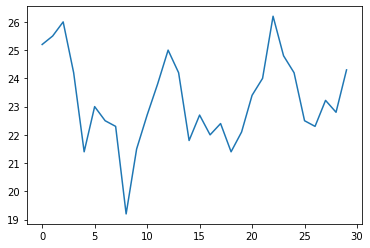

In [17]:
plt.plot(df['Temperature']) # plot the trend

In [18]:
# We can sort the DataFrame by temperature
# and get the top 5 results

df.sort_values('Temperature', ascending=False).head(5) # The beginning of April was pretty hot

,Date,Temperature
22,4/23/2021,26.2
2,4/3/2021,26.0
1,4/2/2021,25.5
0,4/1/2021,25.2
12,4/13/2021,25.0


In [22]:
# If there is a request asking you to find the number of day that is above 24
filter_temp = df['Temperature'] > 24 # just like SQL's 'where Temperature > 24'
df[filter_temp].shape # add the condition back to dataframe and use shape to find structure of dataframe

# There are 10 records above 24 

(10, 2)

In [46]:
# Let say you want to filter the date period as well
# We first need to check whether the data type is timestamps or not
# In this case, it is a string and hence we need to convert it to timestamps

print('Original data type: ', type(df['Date'][0])) # String

# Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases
# if you want to change to python's Datetime, you can use to_pydatetime() function
df['Date'] = pd.to_datetime(df['Date']) 
print('After chaning data type: ', type(df['Date'][0])) # timestamps
df[(df['Temperature'] > 24) & (df['Date'] > '2021-04-15')] # similar to SQL's 'where Temperature > 24 and date > "2021-04-15"'



Original data type:  <class 'pandas._libs.tslibs.timestamps.Timestamp'>
After chaning data type:  <class 'pandas._libs.tslibs.timestamps.Timestamp'>


,Date,Temperature
22,2021-04-23,26.2
23,2021-04-24,24.8
24,2021-04-25,24.2
29,2021-04-30,24.3


#### Exercise
find number of days that are above 25C starting from 11st April (include 11st April)

In [58]:
### Code here ###
# write the conditions here
condition_above_25 = df[(df['Temperature'] > 25)] 
condition_after_11 = df[(df['Date'] > '2021-04-11')] 

# filter the dataframe using above conditions
# hints: should contain one record only
df_filtered = df[(df['Temperature'] > 25) & (df['Date'] > '2021-04-11')] 

# get number of records of filtered dataframe
# It should be a varible but not DataFrame!!!
count = df_filtered['Date'].count()


1

In [59]:
assert count == 1
print('Test passed. Well done!')

Test passed. Well done!
